In [ ]:
!pip install pycaret

In [1]:
from pycaret.classification import *
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/drive/MyDrive/MLOps/creditcard.csv')

In [3]:
data_drop = df.sample(frac=0.9, random_state=42)
df = df.drop(index = data_drop.index)
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
15,12.0,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,0.747731,-0.793981,-0.770407,1.047627,-1.066604,1.106953,1.660114,-0.279265,-0.419994,0.432535,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [4]:
data_unseen = df.sample(frac=0.1, random_state=42)
df = df.drop(index = data_unseen.index)

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (25633, 31)
Unseen Data For Predictions: (2848, 31)


In [5]:
expt_basic = setup(
    data = df,
    target = 'Class',
    train_size = 0.8,
    normalize = True,
    normalize_method = 'zscore',
    numeric_imputation = 'median',
    categorical_imputation = 'mode'
)

,Description,Value
0,session_id,7539
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25633, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
top5 = compare_models(sort = "F1", n_select = 5, fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9995,0.9017,0.7786,0.9092,0.8329,0.8326,0.8381,0.132
rf,Random Forest Classifier,0.9994,0.8995,0.6750,0.9600,0.7887,0.7884,0.8026,3.884
knn,K Neighbors Classifier,0.9993,0.8516,0.6786,0.8933,0.7703,0.7700,0.7778,8.288
et,Extra Trees Classifier,0.9993,0.9259,0.6250,0.9600,0.7439,0.7436,0.7670,1.042
svm,SVM - Linear Kernel,0.9992,0.0000,0.5964,0.9100,0.6937,0.6934,0.7205,0.080
ada,Ada Boost Classifier,0.9991,0.9194,0.5750,0.8600,0.6823,0.6818,0.6989,3.126
lr,Logistic Regression,0.9991,0.9540,0.5964,0.8850,0.6820,0.6817,0.7084,0.728
ridge,Ridge Classifier,0.9991,0.0000,0.5179,0.9500,0.6551,0.6547,0.6914,0.056
gbc,Gradient Boosting Classifier,0.9986,0.7824,0.6036,0.6567,0.6115,0.6109,0.6201,15.346
dt,Decision Tree Classifier,0.9983,0.8138,0.6286,0.5609,0.5765,0.5757,0.5847,0.388


In [8]:
tuned_models = []
for model in top5:
    tuned_models.append(tune_model(model, optimize = 'F1', fold = 5))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.0,0.8750,0.8750,0.8750,0.8748,0.8748
1,0.9990,0.0,0.5714,0.8000,0.6667,0.6662,0.6757
2,0.9995,0.0,0.7143,1.0000,0.8333,0.8331,0.8449
3,0.9995,0.0,0.8571,0.8571,0.8571,0.8569,0.8569
4,0.9998,0.0,1.0000,0.8889,0.9412,0.9411,0.9427
Mean,0.9995,0.0,0.8036,0.8842,0.8347,0.8344,0.8390
SD,0.0002,0.0,0.1473,0.0653,0.0913,0.0914,0.0884


In [9]:
for model in tuned_models:
    print(model)    

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=7539, verbose=0, warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     cr

In [10]:
blended_model = blend_models(estimator_list=[model for model in tuned_models])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
1,0.9990,0.0,0.750,0.7500,0.7500,0.7495,0.7495
2,0.9980,0.0,0.250,0.5000,0.3333,0.3325,0.3527
3,0.9995,0.0,0.750,1.0000,0.8571,0.8569,0.8658
4,0.9995,0.0,0.750,1.0000,0.8571,0.8569,0.8658
5,0.9995,0.0,0.750,1.0000,0.8571,0.8569,0.8658
6,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
9,0.9995,0.0,1.000,0.8000,0.8889,0.8886,0.8942


In [11]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9994,0.9613,0.9231,0.8571,0.8889,0.8886,0.8892


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,-0.538029,-0.395610,-0.296044,0.251017,-1.477932,0.605170,-0.095721,0.191987,0.066588,-1.309918,0.332165,-0.345907,-0.651023,0.467554,-0.165204,-0.685394,2.113108,-1.059313,-0.257043,1.012517,0.713000,0.462033,0.801068,-0.184119,-2.305853,0.396950,-0.494005,0.747734,0.592914,0.030580,0,0
1,-1.753647,0.623275,-0.019402,0.594043,0.162859,-0.565346,-0.384809,-0.447420,-0.071858,1.306275,-0.331016,2.321279,-1.539957,1.987283,1.721796,-0.165996,0.772599,0.034914,0.729558,-0.143815,-0.060510,-0.018605,0.270186,-0.047565,0.583141,0.367303,2.078122,-0.228812,-0.014049,-0.262619,0,0
2,-1.202106,-0.307314,0.569035,1.022503,0.723523,0.264105,-0.827044,0.881064,-0.253482,-1.003553,-0.317835,0.000264,0.587100,1.103722,0.227306,0.892619,-0.705162,-0.029141,-0.335553,0.535716,0.269607,0.186775,0.448511,-0.245433,1.226488,0.533773,-0.634474,0.223310,0.366520,-0.189705,0,0
3,0.961594,-0.138805,0.239426,0.407966,1.034634,0.211567,-0.288933,0.132763,0.105143,-0.507895,-0.212510,1.114278,-0.507418,-1.526637,-0.517137,1.277909,-0.539342,1.762009,1.477500,3.215041,0.471096,0.136196,0.267356,0.097415,-0.133694,-1.269082,1.299616,0.384128,0.601450,-0.130036,0,0
4,1.009575,0.923885,0.069660,-0.036670,2.571115,0.132104,0.962038,-0.526734,0.286544,-0.538532,1.384437,-0.040537,0.581991,0.615988,-0.232532,-1.389435,1.761649,-1.670074,0.778288,-1.580562,-0.144354,0.312401,0.834692,0.199365,0.446230,-0.339176,-0.014244,0.007978,-0.099048,-0.168221,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,1.358009,-0.458818,0.572322,-1.022794,-0.880537,1.080779,-0.671102,0.917568,0.132349,-0.523111,-0.261797,0.185188,0.279822,-0.710424,1.291538,-0.763159,-0.257365,-0.741486,0.351191,0.381190,-0.406105,0.413615,1.239532,0.192837,0.417560,-0.378600,0.122482,0.130576,0.521111,-0.318499,0,0
5123,-1.884499,-0.214882,0.645446,1.010227,0.238492,0.057296,-0.520808,0.420973,-0.003093,0.885435,-0.835609,1.086446,-2.793773,0.954225,1.276840,0.515833,0.000530,1.429432,-0.394571,-0.948817,0.010284,-0.532905,-1.066203,0.165085,0.439208,-0.599127,0.084561,0.564878,0.281603,-0.287634,0,0
5124,1.399654,-1.321565,-1.242554,1.164068,0.448201,2.163423,-0.830094,-0.931084,-0.155761,0.144937,-0.108709,1.433587,0.569723,0.697696,-1.886522,0.700794,0.313731,0.412441,1.392290,1.157598,0.135210,0.098083,1.010119,-1.210395,1.281585,0.672388,1.741607,-0.312167,-1.159007,-0.034167,0,0
5125,-0.106053,1.031684,-0.034173,-0.672238,0.232297,-0.030266,-0.634226,0.099064,-0.189097,0.145568,0.196243,1.165607,1.557086,0.672717,0.356309,-0.768715,-0.029039,-0.594591,-0.693052,0.398999,-0.215006,-0.317816,-0.686935,0.560459,0.058387,-0.618203,0.354342,-0.166897,-0.214499,-0.316550,0,0


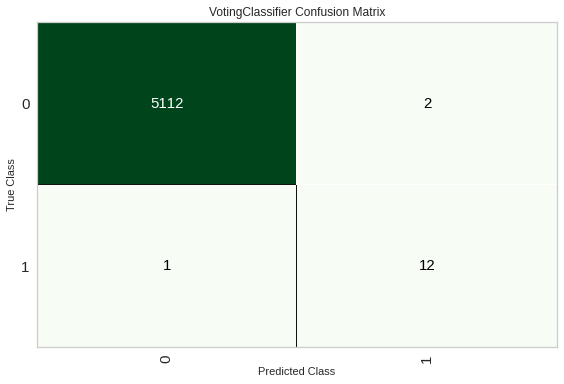

In [12]:
plot_model(blended_model, plot = 'confusion_matrix')

In [13]:
plot_model(blended_model, plot = 'pr')

IntProgress(value=0, description='Processing: ', max=5)

ModelError: ignored

<Figure size 576x396 with 0 Axes>

In [14]:
unseen_predictions = predict_model(blended_model, data = data_unseen)
unseen_predictions.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,123831.0,1.45808,-0.93026,-2.365379,0.447669,0.381869,-0.278734,0.504830,-0.242197,0.927372,-1.017249,-0.970889,0.408786,0.688849,-1.551976,-0.018889,0.163556,0.830182,0.174708,0.223895,0.549018,-0.092675,-0.719976,-0.146016,-0.058131,-0.061501,-0.112025,-0.065275,0.034866,327.81,0,0
1,149577.0,-1.33193,0.56095,0.877326,-0.588652,-0.093342,-0.070838,-0.049653,0.353475,0.294565,-0.708150,-1.241115,0.523161,1.062728,-0.357822,-0.103717,0.384171,-0.520745,0.170531,-0.309921,-0.338214,0.335789,1.054198,0.002055,0.831298,-0.303967,0.522704,-0.327014,0.106332,29.90,0,0


In [16]:
from pycaret.utils import check_metric
print('Accuracy: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Accuracy')))
print('Precision: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision')))
print('Recall: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall')))
print('F1: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1')))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [19]:
save_model(blended_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                              epsilon=0.1,
                                                              eta0=0.1,
                                                              fit_intercept=False,
                                           